## Resize/Crop images

Reading an image in using matplotlib.pyplot.imread. Image data array has shape:

- (M, N) for grayscale images.

- (M, N, 3) for RGB images.

- (M, N, 4) for RGBA images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from utils import *

In [2]:
train_path = "../Data/train"
val_path = "../Data/valid"

classN_train_path = train_path + "/normal/"
classA_train_path = train_path + "/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/"
classL_train_path = train_path + "/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/"
classS_train_path = train_path + "/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/"
classN_valid_path = val_path + "/normal/"
classA_valid_path = val_path + "/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/"
classL_valid_path = val_path + "/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/"
classS_valid_path = val_path + "/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/"


##### Train

In [3]:
mean_sizes = []

print("CLASS: NORMAL")
mean_sizes.append(get_average_image_size(classN_train_path)[0])

print("\nCLASS: A")
mean_sizes.append(get_average_image_size(classA_train_path)[0])

print("\nCLASS: L")
mean_sizes.append(get_average_image_size(classL_train_path)[0])

print("\nCLASS: S")
mean_sizes.append(get_average_image_size(classS_train_path)[0])


CLASS: NORMAL
n7 (2) - Copy.png corrupt
n7 - Copy.png corrupt
n7 (2).png corrupt
n7.png corrupt
Average Image Sizes
    mean:   (428.72222222222223, 571.4722222222222)
    median: (475.0, 562.0)

CLASS: A
Average Image Sizes
    mean:   (258.26666666666665, 385.574358974359)
    median: (256.0, 388.0)

CLASS: L
Average Image Sizes
    mean:   (259.7391304347826, 398.5304347826087)
    median: (261.0, 406.0)

CLASS: S
Average Image Sizes
    mean:   (271.3806451612903, 396.5032258064516)
    median: (274.0, 404.0)


##### Val

In [4]:
print("CLASS: NORMAL")
mean_sizes.append(get_average_image_size(classN_valid_path)[0])

print("\nCLASS: A")
mean_sizes.append(get_average_image_size(classA_valid_path)[0])

print("\nCLASS: L")
mean_sizes.append(get_average_image_size(classL_valid_path)[0])

print("\nCLASS: S")
mean_sizes.append(get_average_image_size(classS_valid_path)[0])


CLASS: NORMAL
Average Image Sizes
    mean:   (531.3846153846154, 691.6153846153846)
    median: (512.0, 617.0)

CLASS: A
Average Image Sizes
    mean:   (248.08695652173913, 383.4347826086956)
    median: (249.0, 381.0)

CLASS: L
Average Image Sizes
    mean:   (239.38095238095238, 373.9047619047619)
    median: (238.0, 376.0)

CLASS: S
Average Image Sizes
    mean:   (261.46666666666664, 390.46666666666664)
    median: (263.0, 392.0)


##### Test

In [21]:
mean_sizes = np.array(mean_sizes)
out_img_size = (int(np.round(mean_sizes[:, 0].mean())), int(np.round(mean_sizes[:, 1].mean())))

print(f"Mean of all images: {out_img_size}")

Mean of all images: (312, 449)


#### Crop and Resize images

In [5]:
out_img_dir = "../Data_Cropped_and_Resized"
output_img_size = (256, 256)

crop_and_resize_images(train_path, output_img_size, out_img_dir)

In [6]:
crop_and_resize_images(val_path, output_img_size, out_img_dir)

##### Visualize results

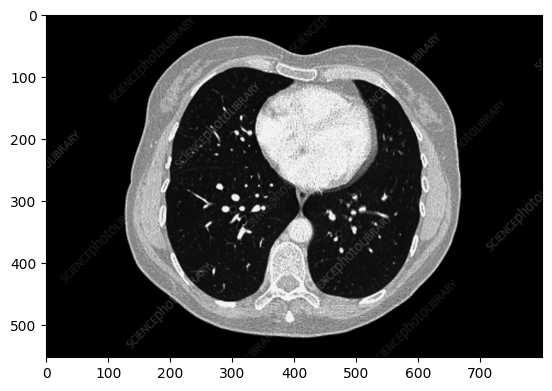

In [21]:
img_name = "/content/drive/MyDrive/W281/Final Project/Data/train/normal/n8.jpg"
img = plt.imread(img_name)
plt.imshow(img)

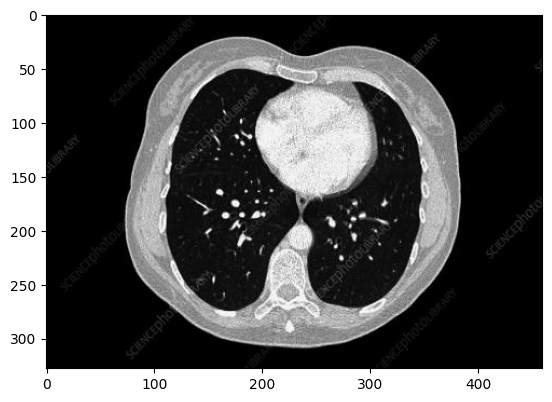

In [23]:
img_name = "/content/drive/MyDrive/W281/Final Project/Data_Resized/train/normal/n8.jpg"
img = plt.imread(img_name)
plt.imshow(img, cmap="gray")

In [24]:
img.shape

(328, 460, 3)